# Titanic - Machine Learning from Disaster

***Adam Dąbkowski***

In [3]:
from utils import *
import pandas as pd
import numpy as np

## 1. Data acquisition

In [4]:
data_train = load_data('./data/train.csv')
data_test = load_data('./data/test.csv')

## 2. Data analysis

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
data_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
data_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 3. Data preparation

In [12]:
X_train = data_train.drop(["Survived"], axis=1)
y_train = data_train["Survived"]
X_test = data_test.drop(["Survived"], axis=1)
y_test = data_test["Survived"]

In [13]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

After analysis, we can conclude that features such as "PassengerId", "Name", "Ticket" are useless. We should also eliminate the "Cabin" feature, because in most cases this feature is empty. For further data preparation, we will divide the data into numeric and non-numeric.


In [15]:
num_attributes = ["Age", "SibSp", "Parch", "Fare"]
cat_attributes = ["Pclass", "Sex", "Embarked"]

X_train_num = X_train[num_attributes]
X_train_cat = X_train[cat_attributes]
X_test_num = X_test[num_attributes]
X_test_cat = X_test[cat_attributes]

In the next step we should fill the missing data in the numeric attributes. We will use median to fill in the empty fields. The most comfortable way is to implement pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
])

In [17]:
X_train_num = num_pipeline.fit_transform(X_train_num)
X_test_num = num_pipeline.transform(X_test_num)

After this we can fill empty fields in "Embarked" feature and proceed to convert the categorical data.


In [18]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [19]:
X_train_cat = cat_pipeline.fit_transform(X_train_cat)
X_test_cat = cat_pipeline.transform(X_test_cat)

In [20]:
new_cat_attributes = []

for cat_set in cat_pipeline['cat_encoder'].categories_:
    for cat in cat_set:
        new_cat_attributes.append(cat)

In the next step we can merge "X_train_cat" and "X_train_num" together

In [21]:
attributes = num_attributes + new_cat_attributes
X_train_data = np.c_[X_train_num, X_train_cat]
X_test_data = np.c_[X_test_num, X_test_cat]

X_train = pd.DataFrame(X_train_data, columns=attributes)
X_test = pd.DataFrame(X_test_data, columns=attributes)

In [22]:
X_train.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Now, we should check the correlation of features

In [23]:
X_train_surv = X_train.copy()
X_train_surv["Survived"] = y_train

In [24]:
corr_matrix = X_train_surv.corr()
corr_matrix

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Survived
Age,1.000000,-0.233296,-0.172482,0.096688,0.323896,0.015831,-0.291955,-0.081163,0.081163,0.030248,-0.031415,-0.006729,-0.064910
SibSp,-0.233296,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.059528,-0.026354,0.068734,-0.035322
Parch,-0.172482,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.081629
Fare,0.096688,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.257307
1,0.323896,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.161921,0.285904
2,0.015831,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.189980,0.093349
3,-0.291955,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.015104,-0.322308
female,-0.081163,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.543351
male,0.081163,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.543351
C,0.030248,-0.059528,-0.011069,0.269335,0.296423,-0.125416,-0.153329,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.168240


In [25]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
female      0.543351
1           0.285904
Fare        0.257307
C           0.168240
2           0.093349
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.064910
S          -0.149683
3          -0.322308
male       -0.543351
Name: Survived, dtype: float64

We can also add new features.

In [26]:
X_train["Family Members"] = X_train["Parch"] + X_train["SibSp"]
X_train["Not Alone"] = (X_train["Family Members"] != 0)

X_test["Family Members"] = X_test["Parch"] + X_test["SibSp"]
X_test["Not Alone"] = (X_test["Family Members"] != 0)

In [27]:
X_train_surv = X_train.copy()
X_train_surv["Survived"] = y_train

In [28]:
corr_matrix = X_train_surv.corr()
corr_matrix

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Family Members,Not Alone,Survived
Age,1.000000,-0.233296,-0.172482,0.096688,0.323896,0.015831,-0.291955,-0.081163,0.081163,0.030248,-0.031415,-0.006729,-0.245619,-0.171647,-0.064910
SibSp,-0.233296,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.059528,-0.026354,0.068734,0.890712,0.584471,-0.035322
Parch,-0.172482,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.783111,0.583398,0.081629
Fare,0.096688,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.217138,0.271832,0.257307
1,0.323896,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.161921,-0.046114,0.113364,0.285904
2,0.015831,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.189980,-0.038594,0.039070,0.093349
3,-0.291955,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.015104,0.071142,-0.129472,-0.322308
female,-0.081163,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.200988,0.303646,0.543351
male,0.081163,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.200988,-0.303646,-0.543351
C,0.030248,-0.059528,-0.011069,0.269335,0.296423,-0.125416,-0.153329,0.082853,-0.082853,1.000000,-0.148258,-0.782742,-0.046215,0.095298,0.168240


In [29]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived          1.000000
female            0.543351
1                 0.285904
Fare              0.257307
Not Alone         0.203367
C                 0.168240
2                 0.093349
Parch             0.081629
Family Members    0.016639
Q                 0.003650
SibSp            -0.035322
Age              -0.064910
S                -0.149683
3                -0.322308
male             -0.543351
Name: Survived, dtype: float64

As we can see, we got two new features.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

trans = StandardScaler()
X_train_t = trans.fit_transform(X_train)
X_test_t = trans.transform(X_test)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_t), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test_t), columns=X_train.columns)

/Users/adamdabkowski/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/adamdabkowski/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/adamdabkowski/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [31]:
X_train

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Family Members,Not Alone
0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.1,1.0
1,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.1,1.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1,1.0
4,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
887,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.3,1.0
889,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [32]:
X_train.to_csv('./data/x_train_prep.csv', index=False)
X_test.to_csv('./data/x_test_prep.csv', index=False)
y_train.to_csv('./data/y_train_prep.csv', index=False)
y_test.to_csv('./data/y_test_prep.csv', index=False)

In [33]:
X_train_pd = X_train
X_train = X_train.to_numpy()

In [34]:
X_test_pd = X_test
X_test = X_test.to_numpy()

## 4. Model training

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict

#### 4.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

In [37]:
y_predicted_log_reg = cross_val_predict(log_reg, X_train, y_train, cv=5)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_scores.mean()

0.7991274872889336

#### 4.2 SGD Classifier

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [39]:
y_predicted_sgd_clf = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
sgd_clf_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5)
sgd_clf_scores.mean()

0.7575607306509322

#### 4.3 Random Forrest

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=250, random_state=42)

In [41]:
y_predicted_forest_clf = cross_val_predict(forest_clf, X_train, y_train, cv=5)
forest_clf_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_clf_scores.mean()

0.8081162513338773

## 5. Performance measures

#### 5.1 Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

<b>Logistic Regression</b>

In [43]:
confusion_matrix(y_train, y_predicted_log_reg)

array([[474,  75],
       [104, 238]])

<b>SGD Classifier</b>

In [44]:
confusion_matrix(y_train, y_predicted_sgd_clf)

array([[410, 139],
       [ 77, 265]])

<b>Random Forest</b>

In [45]:
confusion_matrix(y_train, y_predicted_forest_clf)

array([[468,  81],
       [ 90, 252]])

#### 5.2 Precision, Recall, ${F_1}$score

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

<b>Logistic Regression</b>

In [47]:
prec_log_reg = precision_score(y_train, y_predicted_log_reg)
rec_log_reg = recall_score(y_train, y_predicted_log_reg)
f1_log_reg = f1_score(y_train, y_predicted_log_reg)

print("Precision: ", prec_log_reg)
print("Recall: ", rec_log_reg)
print("F1: ", f1_log_reg)

Precision:  0.7603833865814696
Recall:  0.695906432748538
F1:  0.7267175572519083


<b>SGD Classifier</b>

In [48]:
prec_sgd_clf = precision_score(y_train, y_predicted_sgd_clf)
rec_sgd_clf = recall_score(y_train, y_predicted_sgd_clf)
f1_sgd_clf = f1_score(y_train, y_predicted_sgd_clf)

print("Precision: ", prec_sgd_clf)
print("Recall: ", rec_sgd_clf)
print("F1: ", f1_sgd_clf)

Precision:  0.655940594059406
Recall:  0.7748538011695907
F1:  0.710455764075067


<b>Random Forest</b>

In [49]:
prec_forest_clf = precision_score(y_train, y_predicted_forest_clf)
rec_forest_clf = recall_score(y_train, y_predicted_forest_clf)
f1_forest_clf = f1_score(y_train, y_predicted_forest_clf)

print("Precision: ", prec_forest_clf)
print("Recall: ", rec_forest_clf)
print("F1: ", f1_forest_clf)

Precision:  0.7567567567567568
Recall:  0.7368421052631579
F1:  0.7466666666666667


#### 5.3 Precision - recall curve

In [50]:
from sklearn.metrics import precision_recall_curve

<b>Logistic Regression</b>

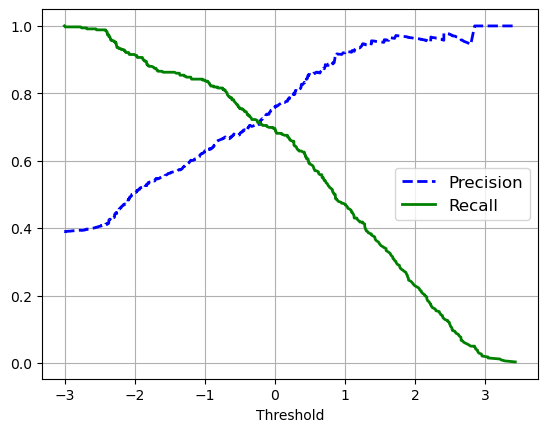

<Figure size 800x400 with 0 Axes>

In [51]:
y_scores_log_reg = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_log_reg)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

We can shift our threshold to find optimal ${F_1}$score

In [52]:
threshold = -0.7
y_predicted_log_reg_mod = (y_scores_log_reg > threshold)

prec = precision_score(y_train, y_predicted_log_reg_mod)
rec = recall_score(y_train, y_predicted_log_reg_mod)
f1 = f1_score(y_train, y_predicted_log_reg_mod)

print("Precision: ", prec)
print("Recall: ", rec)
print("F1: ", f1)

Precision:  0.6690997566909975
Recall:  0.804093567251462
F1:  0.7304116865869854


<b>SGD Classifier</b>

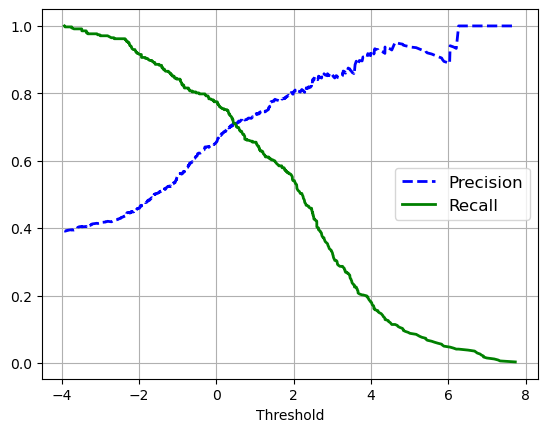

<Figure size 800x400 with 0 Axes>

In [53]:
y_scores_sgd_clf = cross_val_predict(sgd_clf, X_train, y_train, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_sgd_clf)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

#### 5.4 ROC curve

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

<b>Logistic Regression</b>

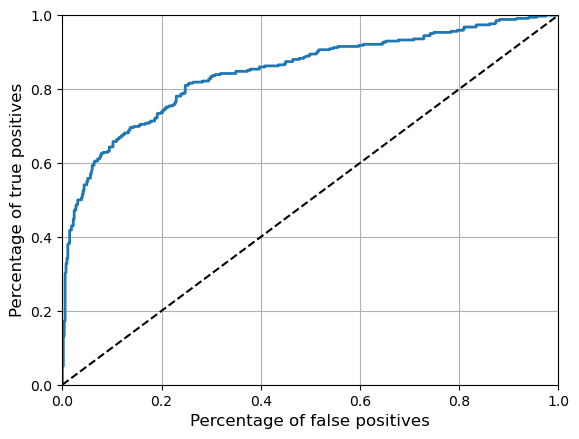

<Figure size 800x400 with 0 Axes>

ROC AUC score:  0.8473300738184258


In [55]:
fpr_log_reg, tpr_log_reg, thresholds = roc_curve(y_train, y_scores_log_reg)
plot_roc_curve(fpr_log_reg, tpr_log_reg)
print("ROC AUC score: ", roc_auc_score(y_train, y_scores_log_reg))

<b>SGD Classifier</b>

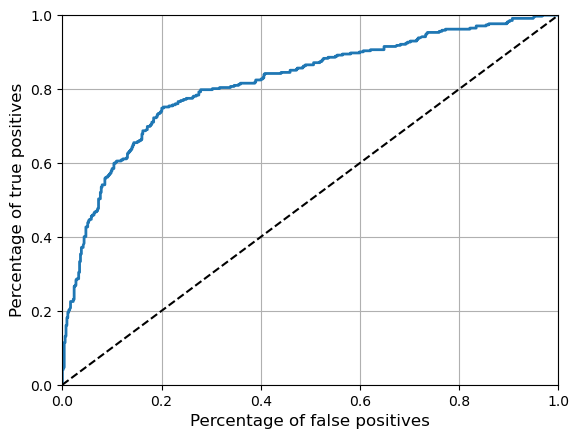

<Figure size 800x400 with 0 Axes>

ROC AUC score:  0.8186974722781453


In [56]:
fpr_sgd_clf, tpr_sgd_clf, thresholds = roc_curve(y_train, y_scores_sgd_clf)
plot_roc_curve(fpr_sgd_clf, tpr_sgd_clf)
print("ROC AUC score: ", roc_auc_score(y_train, y_scores_sgd_clf))

<b>Random Forest</b>

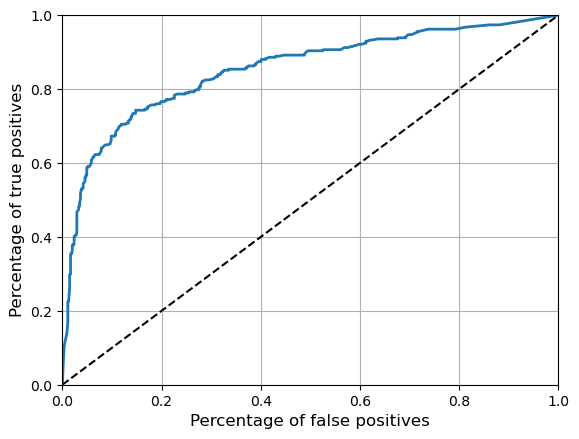

<Figure size 800x400 with 0 Axes>

ROC AUC score:  0.852554884478957


In [57]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5, method="predict_proba")
y_scores_forest_clf = y_probas_forest[:, 1]

fpr_forest_clf, tpr_forest_clf, thresholds = roc_curve(y_train, y_scores_forest_clf)
plot_roc_curve(fpr_forest_clf, tpr_forest_clf)
print("ROC AUC score: ", roc_auc_score(y_train, y_scores_forest_clf))

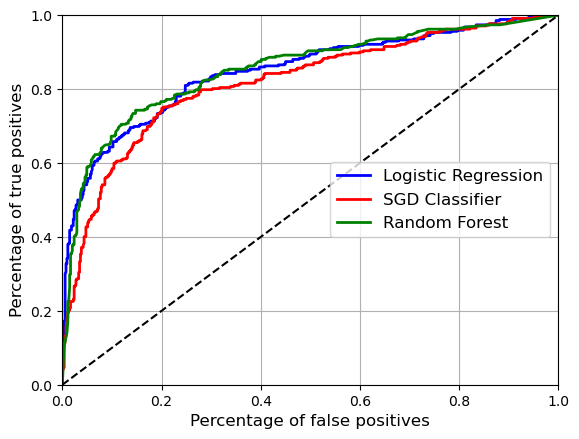

<Figure size 800x400 with 0 Axes>

In [58]:
plot_roc_curves(fpr_log_reg, tpr_log_reg, fpr_sgd_clf, tpr_sgd_clf, fpr_forest_clf, tpr_forest_clf, "Logistic Regression", "SGD Classifier", "Random Forest")

In [59]:
f1_log_reg, f1_sgd_clf, f1_forest_clf

(0.7267175572519083, 0.710455764075067, 0.7466666666666667)

## 6. Model improving

In further considerations, the SVM classifier was omitted due to the worst result

#### 6.1 Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid_log_reg = [
    {"C":np.logspace(-3,3,7), "l1_ratio":np.logspace(-5, 0, 6)}
]

log_reg = LogisticRegression(solver='saga', penalty="elasticnet", max_iter=1e8)
log_reg_grid = GridSearchCV(log_reg, param_grid_log_reg, cv=3, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=100000000.0,
                                          penalty='elasticnet', solver='saga'),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'l1_ratio': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])}],
             scoring='accuracy')

In [38]:
cvres = log_reg_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6161616161616161 {'C': 0.001, 'l1_ratio': 1e-05}
0.6161616161616161 {'C': 0.001, 'l1_ratio': 0.0001}
0.6161616161616161 {'C': 0.001, 'l1_ratio': 0.001}
0.6161616161616161 {'C': 0.001, 'l1_ratio': 0.01}
0.6161616161616161 {'C': 0.001, 'l1_ratio': 0.1}
0.6161616161616161 {'C': 0.001, 'l1_ratio': 1.0}
0.7912457912457912 {'C': 0.01, 'l1_ratio': 1e-05}
0.7912457912457912 {'C': 0.01, 'l1_ratio': 0.0001}
0.7912457912457912 {'C': 0.01, 'l1_ratio': 0.001}
0.7912457912457912 {'C': 0.01, 'l1_ratio': 0.01}
0.7867564534231201 {'C': 0.01, 'l1_ratio': 0.1}
0.6161616161616161 {'C': 0.01, 'l1_ratio': 1.0}
0.7811447811447811 {'C': 0.1, 'l1_ratio': 1e-05}
0.7811447811447811 {'C': 0.1, 'l1_ratio': 0.0001}
0.7811447811447811 {'C': 0.1, 'l1_ratio': 0.001}
0.7811447811447811 {'C': 0.1, 'l1_ratio': 0.01}
0.7811447811447811 {'C': 0.1, 'l1_ratio': 0.1}
0.7867564534231201 {'C': 0.1, 'l1_ratio': 1.0}
0.787878787878788 {'C': 1.0, 'l1_ratio': 1e-05}
0.787878787878788 {'C': 1.0, 'l1_ratio': 0.0001}
0.7878787878787

In [39]:
log_reg_grid.best_params_

{'C': 100.0, 'l1_ratio': 1e-05}

In [41]:
best_log_reg = log_reg_grid.best_estimator_

#### 6.2 Random Forest

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid_forest_clf = [
    {"n_estimators": np.array(range(50, 201, 50)), "max_depth": [5, 6, 7], "max_features":[9, 10, 11, 12], "min_samples_split":[4, 5]}
]

forest_clf = RandomForestClassifier(random_state=42)
forest_clf_grid = GridSearchCV(forest_clf, param_grid_forest_clf, cv=3, scoring='accuracy')
forest_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [5, 6, 7],
                          'max_features': [9, 10, 11, 12],
                          'min_samples_split': [4, 5],
                          'n_estimators': array([ 50, 100, 150, 200])}],
             scoring='accuracy')

In [66]:
cvres = forest_clf_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8215488215488215 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 4, 'n_estimators': 50}
0.8215488215488215 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 4, 'n_estimators': 100}
0.8226711560044894 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 4, 'n_estimators': 150}
0.8215488215488215 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 4, 'n_estimators': 200}
0.8215488215488215 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 50}
0.8237934904601572 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 100}
0.8204264870931538 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 150}
0.8237934904601572 {'max_depth': 5, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 200}
0.8260381593714928 {'max_depth': 5, 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 50}
0.8226711560044894 {'max_depth': 5, 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 100}
0

In [67]:
forest_clf_grid.best_params_

{'max_depth': 7,
 'max_features': 11,
 'min_samples_split': 5,
 'n_estimators': 50}

In [68]:
best_forest_clf = forest_clf_grid.best_estimator_

## 7. Prediction on the test set

In [43]:
from sklearn.metrics import accuracy_score

#### 7.1 Logistic Regression

In [71]:
y_pred_log_reg = best_log_reg.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred_log_reg)

0.7631578947368421

#### 7.2 Random Forest

In [73]:
y_pred_forest_clf = best_forest_clf.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred_forest_clf)

0.7727272727272727

As you can easily see, the random forest classifier achieves better results. However, will the accuracy achieved also be better than that achieved by a neural network?

## Neural Network Model

In [34]:
from sklearn.model_selection import train_test_split

X_train = X_train_pd
X_test = X_test_pd

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [35]:
import tensorflow as tf

In [36]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(X_train.shape[1], ),
        tf.keras.layers.Dense(units=80,
                              activation="elu",
                              kernel_initializer="he_normal",
                              name='L1'),
        tf.keras.layers.Dense(units=60,
                              activation="elu",
                              kernel_initializer="he_normal",
                              name='L4'),
        tf.keras.layers.Dense(units=20,
                              activation="elu",
                              kernel_initializer="he_normal",
                              name='L5'),
        tf.keras.layers.Dense(units=1, activation='sigmoid', name='L6'),
    ], name='model'
)

2022-10-28 20:05:15.069834: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 20:05:15.070365: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [37]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 80)                1200      
_________________________________________________________________
L4 (Dense)                   (None, 60)                4860      
_________________________________________________________________
L5 (Dense)                   (None, 20)                1220      
_________________________________________________________________
L6 (Dense)                   (None, 1)                 21        
Total params: 7,301
Trainable params: 7,301
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])

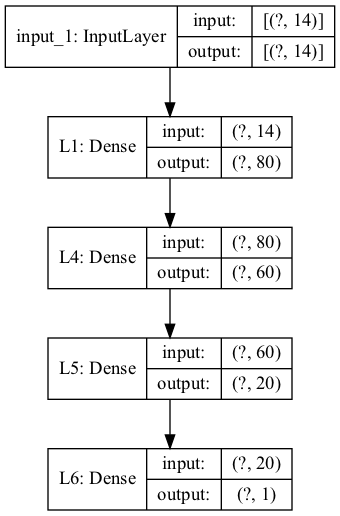

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [40]:
history = model.fit(X_train, y_train, epochs=20, validation_data=[X_val, y_val])

Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712 [==============================] - 0s 691us/sample - loss: 0.5014 - accuracy: 0.7795 - val_loss: 0.4423 - val_accuracy: 0.7877
Epoch 2/20
712/712 [==============================] - 0s 101us/sample - loss: 0.4596 - accuracy: 0.7851 - val_loss: 0.4241 - val_accuracy: 0.8101
Epoch 3/20
712/712 [==============================] - 0s 107us/sample - loss: 0.4366 - accuracy: 0.8132 - val_loss: 0.4206 - val_accuracy: 0.8045
Epoch 4/20
712/712 [==============================] - 0s 115us/sample - loss: 0.4313 - accuracy: 0.8188 - val_loss: 0.4160 - val_accuracy: 0.8212
Epoch 5/20
712/712 [==============================] - 0s 100us/sample - loss: 0.4353 - accuracy: 0.8076 - val_loss: 0.4174 - val_accuracy: 0.8045
Epoch 6/20
712/712 [==============================] - 0s 99us/sample - loss: 0.4254 - accuracy: 0.8202 - val_loss: 0.4236 - val_accuracy: 0.8045
Epoch 7/20
712/712 [==============================] - 0s 96us/sample - loss: 0.

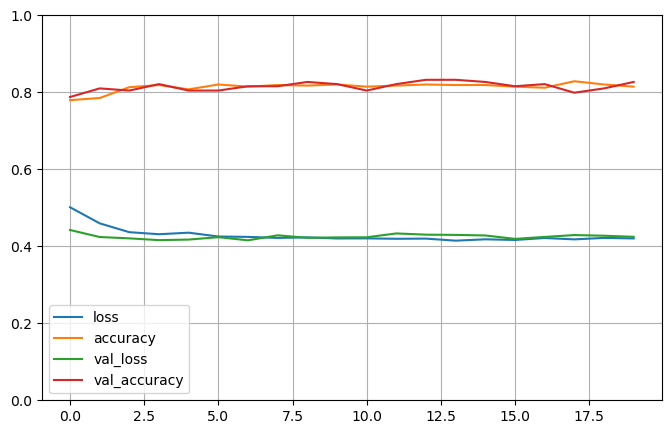

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
y_pred_nn = model.predict_classes(X_test)

In [45]:
accuracy_score(y_test, y_pred_nn)

0.784688995215311

## Result

#### Neural networks, as always, are the best :)